<a href="https://colab.research.google.com/github/ShreySrivas/EDA_Bangalore_Restaurants/blob/main/Bangalore_Restaurants_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis of Restaurants in Bangalore**

# Import Libraries


*   import necessary libraries
*   obtain dataset from kaggle





In [3]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants' 
od.download('https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shreysrivastava15
Your Kaggle Key: ··········


100%|██████████| 89.0M/89.0M [00:00<00:00, 152MB/s]


In [5]:
data_filename = './zomato-bangalore-restaurants/zomato.csv'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation and Data Cleaning


*   Load data into pandas dataframe
*   Evaluate missing and incorrect values
*   Mitigate missing values by either ignoring irrelevant attributes or removing null valued rows






In [7]:
df = pd.read_csv(data_filename)


In [8]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [11]:
missing_percent = df.isna().sum().sort_values(ascending=False)/len(df)*100
missing_percent

dish_liked                     54.291626
rate                           15.033741
phone                           2.335789
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location                        0.040606
listed_in(type)                 0.000000
menu_item                       0.000000
reviews_list                    0.000000
url                             0.000000
address                         0.000000
votes                           0.000000
book_table                      0.000000
online_order                    0.000000
name                            0.000000
listed_in(city)                 0.000000
dtype: float64

In [12]:
df.isna().sum().sort_values(ascending=False)

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

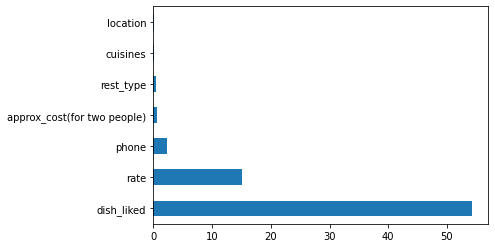

In [13]:
missing_percent[missing_percent > 0].plot(kind='barh')

In [14]:
df['menu_item'].str.contains('[ ]').sum()

12098

### Removing columns that don't have significant collaborations

### Columns to remove:
  1. dish_liked
  2. phone
  3. menu_items
  4. rest_type
  5. location
  6. url
  7. address

In [15]:
df_modified = df.drop(df.iloc[:,0:2], axis=1)
df_modified.columns
df_modified = df_modified.drop(df.iloc[:,7:11], axis=1)
df_modified.columns
df_modified = df_modified.drop(['menu_item'], axis=1)
df_modified.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [16]:
df_modified = df_modified.drop(df_modified[df_modified['approx_cost(for two people)'].isna() | df_modified['cuisines'].isna()].index)
df_modified.isna().sum().sort_values(ascending=False)

rate                           7670
name                              0
online_order                      0
book_table                        0
votes                             0
cuisines                          0
approx_cost(for two people)       0
reviews_list                      0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [17]:
df_final = df_modified.drop(df_modified[df_modified['rate'].isna()].index)
df_final.isna().sum().sort_values(ascending=False)

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [18]:
df_final = df_final.reset_index()

In [19]:
df_final.drop(['index'], inplace=True, axis=1)

In [20]:
df_final

,name,online_order,book_table,rate,votes,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
43677,The Farm House Bar n Grill,No,No,3.7 /5,34,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield
43678,Bhagini,No,No,2.5 /5,81,"Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield
43679,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
43680,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield


In [21]:
temp = df_final['rate'].str.split('/')
temp2 = [i[0] for i in temp]

df_final['new_rate'] = temp2
df_final['new_rate']
df_final.drop(['rate'], inplace=True, axis=1)


In [22]:
df_final = df_final.drop(df_final[df_final['new_rate'].str.contains('NEW')].index)
df_final = df_final.reset_index()
df_final.drop(['index'], inplace=True, axis=1)
df_final

,name,online_order,book_table,votes,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),new_rate
0,Jalsa,Yes,Yes,775,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,"Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7
4,Grand Village,No,No,166,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...
41470,The Farm House Bar n Grill,No,No,34,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield,3.7
41471,Bhagini,No,No,81,"Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,2.5
41472,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,3.6
41473,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,4.3


# Exploratory Analysis and Visualization

Questions asked:

*  How does location of a restaurant affect food prices?
*  Is a particular neighborhood famous for its own kind of food?
*  Which locality of the city serves cuisines with maximum number of restaurants?
* Which areas experience most amount of crowd?
*   Is cost affected by restaurant type?
*   Areas with best ratings?




## We analyse various attributes of df_final

In [23]:
df_final.rename(columns={'listed_in(city)':'location'}, inplace=True)
df_final.rename(columns={'listed_in(type)':'type'}, inplace=True)

In [24]:
df_final.rename(columns={'approx_cost(for two people)':'meal_cost'}, inplace=True)

### We evaluate distribution of various restaurants at various locations

In [25]:
df_final.location.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [26]:
restaurants_in_locality = df_final.location.value_counts()
restaurants_in_locality.index

Index(['BTM', 'Koramangala 7th Block', 'Koramangala 4th Block',
       'Koramangala 5th Block', 'Koramangala 6th Block', 'Jayanagar',
       'JP Nagar', 'Indiranagar', 'Church Street', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Residency Road', 'HSR', 'Marathahalli',
       'Bannerghatta Road', 'Whitefield', 'Old Airport Road', 'Brookefield',
       'Basavanagudi', 'Sarjapur Road', 'Kammanahalli', 'Kalyan Nagar',
       'Bellandur', 'Frazer Town', 'Malleshwaram', 'Rajajinagar',
       'Electronic City', 'Banashankari', 'New BEL Road'],
      dtype='object')

In [27]:
df_final['meal_cost'] = df_final['meal_cost'].str.replace(',','')

In [28]:
pd.to_numeric(df_final['meal_cost'])


0         800
1         800
2         800
3         300
4         600
         ... 
41470     800
41471     800
41472    1500
41473    2500
41474    1500
Name: meal_cost, Length: 41475, dtype: int64

#### Average meal cost in Bangalore

In [52]:
df_final['meal_cost'].mean()

603.3121468244385

In [29]:
df_final.drop(df_final[df_final['new_rate'].str.contains('-')].index, inplace=True)
df_final = df_final.reset_index()
df_final.drop(['index'], inplace=True, axis=1)
df_final

,name,online_order,book_table,votes,cuisines,meal_cost,reviews_list,type,location,new_rate
0,Jalsa,Yes,Yes,775,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,"Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.7
4,Grand Village,No,No,166,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...
41405,The Farm House Bar n Grill,No,No,34,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",Pubs and bars,Whitefield,3.7
41406,Bhagini,No,No,81,"Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,2.5
41407,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,3.6
41408,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,4.3


In [30]:
df_final['new_rate'] = pd.to_numeric(df_final['new_rate'])

#### BTM seems to have most amount of restaurants in its locality

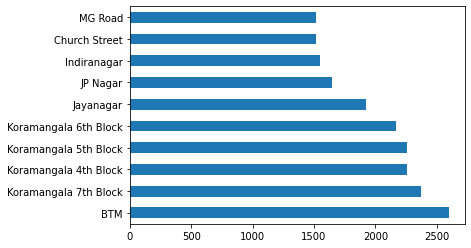

In [31]:
restaurants_in_locality[:10].plot(kind = 'barh')

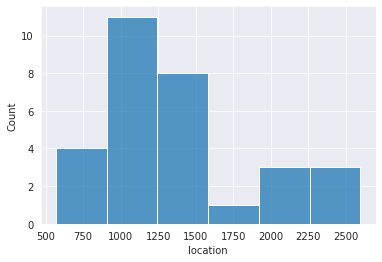

In [32]:
sns.set_style("darkgrid")
sns.histplot(restaurants_in_locality )

### Relationship between votes and new_rate is analyzed

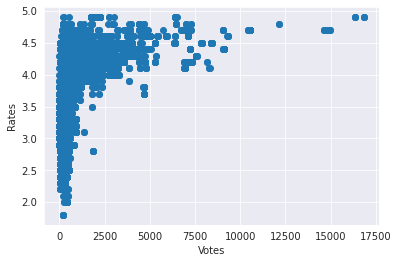

In [34]:
plt.scatter(df_final['votes'], df_final['new_rate'])
plt.xlabel("Votes")
plt.ylabel("Rates")
plt.show()

### Relationship between location and new_rate is analyzed

In [36]:
df_final.groupby('location')['new_rate'].mean().sort_values(ascending=False)

location
Church Street            3.802635
Brigade Road             3.801146
MG Road                  3.800132
Residency Road           3.779182
Lavelle Road             3.775396
Koramangala 6th Block    3.762359
Koramangala 5th Block    3.759513
Koramangala 4th Block    3.758974
Koramangala 7th Block    3.758035
Indiranagar              3.746762
Old Airport Road         3.723005
Malleshwaram             3.716068
Frazer Town              3.715514
Basavanagudi             3.707276
BTM                      3.706618
Jayanagar                3.694956
Banashankari             3.667263
HSR                      3.662022
Rajajinagar              3.658028
Kalyan Nagar             3.648646
Kammanahalli             3.639317
New BEL Road             3.636380
JP Nagar                 3.629562
Whitefield               3.628571
Bellandur                3.624249
Sarjapur Road            3.595521
Brookefield              3.562315
Bannerghatta Road        3.555875
Marathahalli             3.552147
Elect

### Relationship between votes and meal_cost is analyzed

In [37]:
df_final['meal_cost'] = pd.to_numeric(df_final['meal_cost'])

In [38]:
import scipy

In [39]:
df_final.groupby('location')['meal_cost'].median().sort_values(ascending=False)


location
Residency Road           600.0
Lavelle Road             600.0
Brigade Road             600.0
MG Road                  600.0
Church Street            600.0
Whitefield               500.0
Frazer Town              500.0
Kalyan Nagar             500.0
Indiranagar              500.0
Koramangala 4th Block    500.0
Old Airport Road         500.0
Bellandur                500.0
Sarjapur Road            500.0
Malleshwaram             450.0
Koramangala 6th Block    450.0
Koramangala 7th Block    450.0
Marathahalli             450.0
Kammanahalli             450.0
Koramangala 5th Block    450.0
HSR                      450.0
Brookefield              450.0
Banashankari             400.0
Jayanagar                400.0
JP Nagar                 400.0
Electronic City          400.0
New BEL Road             400.0
Rajajinagar              400.0
Basavanagudi             400.0
Bannerghatta Road        400.0
BTM                      400.0
Name: meal_cost, dtype: float64

### Relationship between meal_cost and new_rate is explored

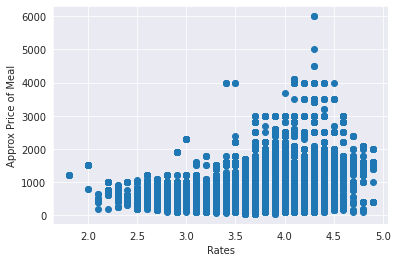

In [40]:
plt.scatter(df_final['new_rate'], df_final['meal_cost'])
plt.xlabel("Rates")
plt.ylabel("Approx Price of Meal")
plt.show()

### Popular restuarant types are explored 

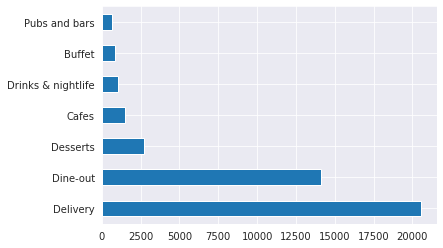

In [41]:
df_final.type.value_counts().plot(kind = 'barh')

### Relationship between type and meal is analyzed

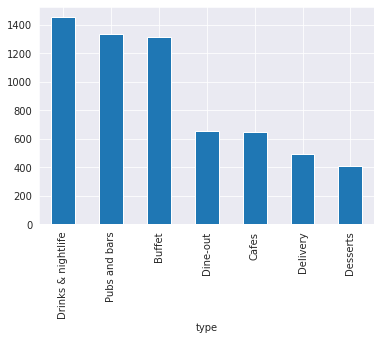

In [42]:
df_final.groupby('type')['meal_cost'].mean().sort_values(ascending=False).plot(kind = 'bar')


### Distribution of cusines is explored

In [43]:
foods = df_final['cuisines'].str.split(',')

In [44]:
df_final['food_item'] = [i[0] for i in foods]

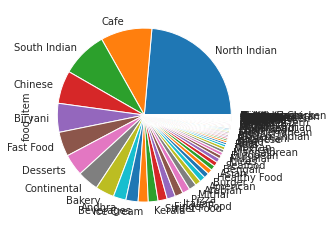

In [45]:
df_final['food_item'].value_counts().plot(kind = 'pie')

In [46]:
df_final.groupby('location')['food_item'].agg(lambda x: scipy.stats.mode(x)[0]).sort_values(ascending=False)


location
Banashankari             South Indian
BTM                      North Indian
Sarjapur Road            North Indian
Residency Road           North Indian
Rajajinagar              North Indian
Old Airport Road         North Indian
New BEL Road             North Indian
Marathahalli             North Indian
Malleshwaram             North Indian
MG Road                  North Indian
Lavelle Road             North Indian
Koramangala 7th Block    North Indian
Koramangala 6th Block    North Indian
Koramangala 5th Block    North Indian
Koramangala 4th Block    North Indian
Kammanahalli             North Indian
Kalyan Nagar             North Indian
Jayanagar                North Indian
JP Nagar                 North Indian
Indiranagar              North Indian
HSR                      North Indian
Frazer Town              North Indian
Electronic City          North Indian
Church Street            North Indian
Brookefield              North Indian
Brigade Road             North Indian
Bel

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


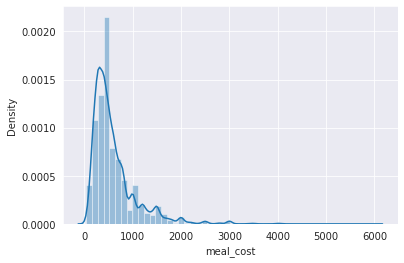

In [47]:
sns.distplot(df_final['meal_cost'], norm_hist=False)

# Summary


1.   Areas Like BTM,Koramangala,Koramangala are bustling and hence have a lot restaurants.
2. Church Street, Brigade Road, MG Road have restaurants with highest average reviews.
3. Residency Road, Lavelle Road, Brigade Road, MG Road, Church Street have expensive restaurants.
4. Most people prefer take outs and casual dine-outs.
6. People spend most amount of money at pubs, bars and drinks.
7. North Indian food is generally prefered by the populace followed by cafe and south indian food.
8. Average meal cost in Bangalore is 603.31





# Conclusion

This analysis helped me understand the various factors affecting restaurants in Bangalore and how they impact their meal pricing and popularity. This could help people who are looking to establish a restuarant in a profitable area or it could aid individuals seeking a good place to eat.

Further conclusions can be drawn from this data if there was a date attribute that would include changes in various factors during the pandemic and post pandemic.